Stock Market Prediction And Forcasting Using Stacked LSTM

In [45]:
## DATA COLLECTION
import pandas_datareader as pdr
from keras.models import sequential
from keras.layers import Dense, LSTM

In [46]:
key = "61b0367015b17a1bf4e531bb02e0a755b5025b53"

In [47]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [48]:
df.to_csv('AAPL.csv')

In [49]:
import pandas as pd

In [50]:
df=pd.read_csv('AAPL.csv')

In [51]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-08-04 00:00:00+00:00,156.390000,157.40,155.6900,156.07,20349532,37.005562,37.244552,36.839925,36.929842,81398128,0.00,1.0
1,AAPL,2017-08-07 00:00:00+00:00,158.810000,158.92,156.6701,157.06,21870321,37.578191,37.604219,37.071840,37.164100,87481284,0.00,1.0
2,AAPL,2017-08-08 00:00:00+00:00,160.080000,161.83,158.2700,158.60,35775675,37.878703,38.292794,37.450414,37.528500,143102700,0.00,1.0
3,AAPL,2017-08-09 00:00:00+00:00,161.059998,161.27,159.1100,159.26,25640394,38.110593,38.160285,37.649178,37.684671,102561576,0.00,1.0
4,AAPL,2017-08-10 00:00:00+00:00,155.320000,160.00,154.6300,159.90,39081017,36.901447,38.013338,36.737515,37.989579,156324068,0.63,1.0


In [52]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2022-07-27 00:00:00+00:00,156.79,157.33,152.16,152.58,78620688,156.79,157.33,152.16,152.58,78620688,0.0,1.0
1253,AAPL,2022-07-28 00:00:00+00:00,157.35,157.64,154.41,156.98,81378731,157.35,157.64,154.41,156.98,81378731,0.0,1.0
1254,AAPL,2022-07-29 00:00:00+00:00,162.51,163.63,159.50,161.24,101786860,162.51,163.63,159.50,161.24,101786860,0.0,1.0
1255,AAPL,2022-08-01 00:00:00+00:00,161.51,163.59,160.89,161.01,67829379,161.51,163.59,160.89,161.01,67829379,0.0,1.0
1256,AAPL,2022-08-02 00:00:00+00:00,160.01,162.41,159.63,160.10,59907025,160.01,162.41,159.63,160.10,59907025,0.0,1.0


Here we are taking 'Close' column and for this particular price we will be doing stock prediction

In [53]:
df1=df.reset_index()['close']

In [54]:
df1

0       156.390000
1       158.810000
2       160.080000
3       161.059998
4       155.320000
           ...    
1252    156.790000
1253    157.350000
1254    162.510000
1255    161.510000
1256    160.010000
Name: close, Length: 1257, dtype: float64

In [55]:
df1.shape

(1257,)

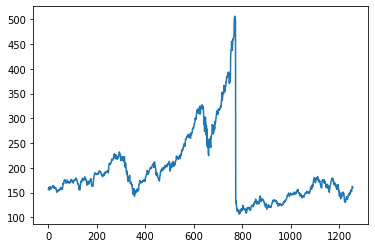

In [56]:
import matplotlib.pyplot as plt
plt.plot(df1)

LSTM are sensitive to the scale of the data. so we apply MinMax Scaler

In [57]:
import numpy as np

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [59]:
print(df1)

[[0.1241077 ]
 [0.13016907]
 [0.13335003]
 ...
 [0.13943644]
 [0.13693175]
 [0.1331747 ]]


Splitting the data into Train and Test split

In [60]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [61]:
training_size,test_size

(817, 440)

In [62]:
len(train_data), len(test_data)

(817, 440)

In [63]:
train_data

array([[1.24107702e-01],
       [1.30169067e-01],
       [1.33350031e-01],
       [1.35804629e-01],
       [1.21427677e-01],
       [1.26837821e-01],
       [1.32773951e-01],
       [1.37157170e-01],
       [1.35529117e-01],
       [1.27789606e-01],
       [1.26887915e-01],
       [1.26161553e-01],
       [1.32598622e-01],
       [1.33099562e-01],
       [1.31321227e-01],
       [1.32798998e-01],
       [1.36831559e-01],
       [1.40438322e-01],
       [1.41540388e-01],
       [1.43168441e-01],
       [1.43293676e-01],
       [1.38359424e-01],
       [1.37933626e-01],
       [1.36305573e-01],
       [1.29718222e-01],
       [1.36906700e-01],
       [1.35303694e-01],
       [1.32273012e-01],
       [1.28841578e-01],
       [1.32849092e-01],
       [1.29818410e-01],
       [1.29968691e-01],
       [1.23306199e-01],
       [1.16593613e-01],
       [1.12836569e-01],
       [1.09480276e-01],
       [1.15967439e-01],
       [1.18697558e-01],
       [1.16318096e-01],
       [1.18422041e-01],


In [64]:
test_data

array([[0.00483406],
       [0.00901691],
       [0.02031309],
       [0.03053225],
       [0.02968065],
       [0.02374452],
       [0.02286788],
       [0.03168441],
       [0.03098309],
       [0.03110833],
       [0.03371321],
       [0.03143394],
       [0.02802755],
       [0.02955542],
       [0.02629931],
       [0.01755792],
       [0.02086412],
       [0.02301816],
       [0.02442079],
       [0.03058234],
       [0.03977458],
       [0.04067627],
       [0.04032561],
       [0.03859737],
       [0.04235441],
       [0.04393237],
       [0.03742016],
       [0.04107702],
       [0.03899812],
       [0.03742016],
       [0.05269881],
       [0.05252348],
       [0.05475266],
       [0.04963056],
       [0.05357545],
       [0.0627176 ],
       [0.06041327],
       [0.06294302],
       [0.07476518],
       [0.07020664],
       [0.06732624],
       [0.0647464 ],
       [0.056531  ],
       [0.06053851],
       [0.0494928 ],
       [0.06031309],
       [0.06314339],
       [0.055

convert an array of values into a dataset matrix

In [65]:
import numpy
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]  ###i=0, 0,1,2,3.....99  100
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

Reshape into X=t,t+1,t+2,t+3 and Y=t+4

In [66]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [67]:
print(X_train.shape), print(y_train.shape)

(1, 100)
(1,)


(None, None)

In [68]:
print(X_test.shape), print(ytest.shape)

(1, 100)
(1,)


(None, None)

Reshape input to be [samples , time steps , features] which is required for LSTM

In [69]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

Create stacked LSTM model

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [71]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 0.0261 - val_loss: 1.8723e-04
Epoch 2/100
1/1 [==============================] - 0s 130ms/step - loss: 0.0160 - val_loss: 1.1223e-04
Epoch 3/100
1/1 [==============================] - 0s 133ms/step - loss: 0.0080 - val_loss: 0.0015
Epoch 4/100
1/1 [==============================] - 0s 141ms/step - loss: 0.0021 - val_loss: 0.0054
Epoch 5/100
1/1 [==============================] - 0s 137ms/step - loss: 3.1741e-05 - val_loss: 0.0113
Epoch 6/100
1/1 [==============================] - 0s 132ms/step - loss: 0.0031 - val_loss: 0.0128
Epoch 7/100
1/1 [==============================] - 0s 131ms/step - loss: 0.0043 - val_loss: 0.0106
Epoch 8/100
1/1 [==============================] - 0s 127ms/step - loss: 0.0025 - val_loss: 0.0076
Epoch 9/100
1/1 [==============================] - 0s 131ms/step - loss: 7.0082e-04 - val_loss: 0.0051
Epoch 10/100
1/1 [==============================] - 0s 141ms/step - loss: 8.2180e-06 - val_loss:

In [74]:
import tensorflow as tf

Lets do the prediction and check performance metrics

In [75]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

Transform back to original form

In [76]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

Calculate RMSE performance metrics

In [77]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

170.4233388936348

Test data RMSE

In [78]:
math.sqrt(mean_squared_error(ytest,test_predict))

154.97936477422266

plotting the graph

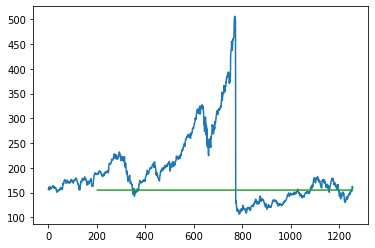

In [79]:
#shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [80]:
len(test_data)

440

In [81]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [82]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

Demonstrate prediction for next 10 days

In [84]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):

  if(len(temp_input)>100):
    #print(temp_input)
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps, 1))
    #print(x_input)
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
      x_input = x_input.reshape((1, n_steps,1))
      yhat = model.predict(x_input, verbose=0)
      print(yhat[0])
      temp_input.extend(yhat[0].tolist())
      print(len(temp_input))
      lst_output.extend(yhat.tolist())
      i=i+1

0 day input [0.11994991 0.1096556  0.1208516  0.13212273 0.13470257 0.14311835
 0.14662492 0.15524108 0.1587226  0.16839073 0.17001879 0.17222292
 0.1806387  0.17765811 0.16974327 0.16899186 0.17933626 0.17087038
 0.16278021 0.16355667 0.15842204 0.14755166 0.15233563 0.1591985
 0.1463995  0.14584847 0.15168441 0.15125861 0.14922981 0.13763306
 0.14036318 0.12513463 0.12455855 0.14226675 0.12726362 0.12804008
 0.13184721 0.14822793 0.12505949 0.12633688 0.11326237 0.11939887
 0.09933626 0.08946775 0.10086412 0.09693175 0.10619912 0.08510958
 0.07641828 0.07701941 0.09084534 0.08395742 0.08435817 0.09252348
 0.107201   0.10519724 0.10487163 0.11113338 0.096531   0.09843456
 0.10487163 0.10299311 0.08966813 0.07586725 0.0627176  0.06492173
 0.07160927 0.05815905 0.06191609 0.07271133 0.07140889 0.0787226
 0.08721353 0.08721353 0.07664371 0.08112711 0.07484033 0.0803757
 0.08696306 0.09036944 0.09896055 0.10068879 0.0952536  0.09773325
 0.09680651 0.10427051 0.10852849 0.10076393 0.110607

Data is of 100 days and
Prediction is to be done for 30 days

```
# This is formatted as code
```



In [86]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [87]:
import matplotlib.pyplot as plt

In [88]:
len(df1)

1257

In [89]:
df3=df1.tolist()
df3.extend(lst_output)


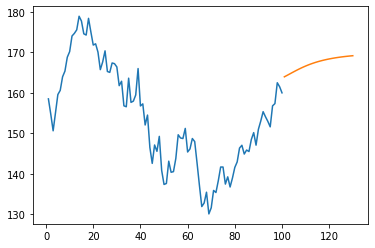

In [91]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

Combined prediction of 30 days

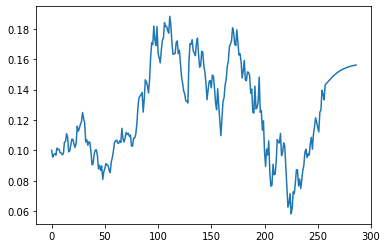

In [92]:
plt.plot(df3[1000:])


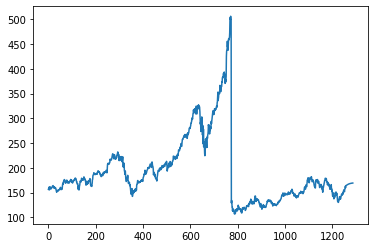

In [93]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

**FINAL RESULT OF PREDICTING APPLE STOCK PRICE FOR NEXT 30 DAYS**



